Họ và tên: Đặng Văn Minh
MSSV: 19521832

Onemax - POPOP - 1X: thực nghiệm giải vấn đề onemax bằng cài đặt POPOP với cài đặt one point crossover

1 - Packages

2 - Code

     - initial_population
     - onemax
     - crossover_1X
     - tournament_selection
     - convergence
     - POPOP_genetic_algorithm
     - pass_10_time
     - upper_bound
     - MRPS
     
3 - Experiments: Bisection - MRPS

    - Probelm size: 10
    - Probelm size: 20
    - Probelm size: 40
    - Probelm size: 80
    - Probelm size: 160

# 1 - Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2 - Code


In [2]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return pop

In [3]:
def onemax(ind):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).
    
    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ###     
    value = np.sum(ind)
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return value

In [4]:
def crossover_1X(pop):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất one point crossover. 
        cross_point = np.random.randint(num_parameters)
#         print(f'cross point: {cross_point}')
        for idx in range(cross_point, num_parameters):
                temp = offspring2[idx] 
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

In [5]:
pop = initialize_population(2, 10)
print(f'population\n: {pop}')
offstring = crossover_1X(pop)
print(f'offstring\n: {offstring}')

population
: [[0 0 1 0 0 0 1 0 1 1]
 [0 1 0 0 1 1 0 1 0 0]]
offstring
: [[0 0 1 0 0 0 1 1 0 0]
 [0 1 0 0 1 1 0 0 1 1]]


In [6]:
def tournament_selection(parent_population, parent_fitness, population_size, tourament_size):
    
    """
    Hàm thực hiện tournament selection:
    Args: 
        - parent_population: quần thể được sử dụng để chọn ra thế hệ tiếp theo
        - parent_fitness: fitness của những cá thể trong parent_population
        - population_size: kích thước thế hệ tiếp theo
        - tournament_size: kích thước chia parent_population để thược hiện lựa chọn cạnh tranh 
        
    Returns:
        - selected_indices: chỉ số những cá thể được chọn
    
    # vd:   parent_population: có 8 cá thể => len(parent_fitness) = 8
            population_size: chọn 4 cá thể cho thế hệ tiếp theo
            tournament_size: 4
    """
    
    n_tournament = len(parent_population) //tournament_size # 8/4 = 2 -> mỗi lần chia quần thể thành 2 phần bằng nhau
    n_loop = population_size // n_tournament                # 4/2 = 2 -> cần 2 lần chia để chọn đủ 4 cá thể 
    selected_indices = []
    indices = np.arange(len(parent_population))
    
    for i in range(n_loop):
        # Xáo trộn quần thể
        np.random.shuffle(indices)
        
        # xét qua từng tournament
        for tournament in range(n_tournament):
            # lấy điểm bắt đầu tournament
            begin_point = tournament * tournament_size
            
            tournament_indices = indices[begin_point:begin_point+tournament_size]
            # Tìm phần tử có fitness lớn nhất 
            idx_max = np.argmax(parent_fitness[tournament_indices])
            # Thêm cá thể được chọn vào danh sách
            selected_indices.append(tournament_indices[idx_max])
        
    return np.array(selected_indices)

In [7]:
def convergence(pop):
    """
    Convergence when individuals is all the same ==> row is all the same
    Args: 
        - Population: (n_individuals, n_variables)
    Return:
        - True if all inds same else False
        
    vd:  arr = [[0, 1, 1, 0],
                [0, 1, 1, 0]]
        sum(arr) = [0, 2, 2, 0] 
        - phần tử của sum(arr) == 0 or len(arr) ==> hội tụ
        
    """
    n_ind, n_var = pop.shape
    
    # sum all row
    arr = pop.sum(axis=0)
    
    for i in range(n_var):
        if arr[i] != 0 and arr[i] != n_ind:
            return False
    return True

In [8]:
def POPOP_genetic_algorithm(num_individuals, num_parameters, tournament_size):
    
    """
    Args: 
        - num_individuals: số cá thể của quần thể
        - num_parameters: độ dài cá thể 
        - tournament_size: kích thước tournament sử dụng cho tournament selection
    Returns: 
        - is_optimal: 1 nếu tìm được đáp án (cá thể chứa toàn 1) ngược lại 0
        - num_of_evaluations: số lần gọi hàm đánh giá
    """
    
    # Initialize individuals
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([onemax(ind) for ind in pop])
    
    num_of_evaluations = len(pop)
    
    generations = 0
#     print(f'Gen: 0')
#     print(pop_fitness)
    
    while True:
        # check convergence of population
        if convergence(pop) == True: 
            break  
        # if not converge, create new generation
        generations += 1
            
        # Create offstring use crossover, do not use mutation
        offstring = crossover_1X(pop)
        offstring_fitness = np.array([onemax(ind) for ind in offstring])
        num_of_evaluations += len(offstring)
        
        
        # P + O pool
        P_O_pool = np.vstack((pop, offstring))
        P_O_pool_fitness = np.hstack((pop_fitness, offstring_fitness))
        
        # Select parent for next generation
        selected_indices = tournament_selection(P_O_pool, P_O_pool_fitness, num_individuals, tournament_size)
        pop = P_O_pool[selected_indices]
        pop_fitness = P_O_pool_fitness[selected_indices]
        
#         print(f'Gen: {generations}') 
#         print(pop_fitness)
        
#     print('# Final result:')
#     print(pop)
#     print(pop_fitness)
        
    # return 1 if can find optimal solution else 0      
    is_optimal = 0
    if (pop_fitness == num_parameters).all():
        is_optimal = 1
    return is_optimal, num_of_evaluations

In [9]:
# test POPOP_genetic_algorithm
problem_size = 8
population_size = 4
tournament_size = 4
np.random.seed(19521832)
POPOP_genetic_algorithm(population_size, problem_size, tournament_size)

(1, 12)

In [10]:
def pass_10_test(population_size, problem_size, tournament_size, random_seed):
    """
    Chạy 10 lần POPOP_genetic_algorithm với cùng kích thước quần thể và random_seed khác nhau,
    dừng lại khi gặp lần chạy không tìm được có có thể tối ưu
    
    Args: 
        - Population_size
        - problem_size
        - tournament_size
        - random_seed
    Returns:
        - success_10_time: True nếu 10 lần thực hiện POPOP_genetic_algorithm tìm được cá thể tối ưu ngược lại False
        - average_number_of_evaluations: trung bình số lần gọi hàm đánh giá trong quá trình chạy
    """
    
    success_10_time = True
    num_evaluations = []
    
    # lặp 10 lần với random seed khác nhau  
    for i in range(10):
        
        np.random.seed(random_seed + i)
#         print(f'Lần {i} - random seed {random_seed}')
        
        success, num_evaluation = POPOP_genetic_algorithm(population_size, problem_size, tournament_size)
#         print(f' -- success: {success} \n -- số lần gọi hàm đánh giá: {num_evaluation}')
        
        num_evaluations.append(num_evaluation)
        
        # nếu lần chạy không tìm được cá thể tối ưu thì break
        if success == 0:
#             print("BREAK")
            success_10_time = False
            break
        
    average_number_of_evaluations = np.mean(num_evaluations)
    
    return success_10_time, average_number_of_evaluations

In [11]:
# test pass_10_test
problem_size = 10
population_size = 30
tournament_size = 4
random_seed = 19521832
test, ane = pass_10_test(population_size, problem_size, tournament_size, random_seed)
print(f'success: {test}')
print(f'average_number_of_evaluations: {ane}')

success: False
average_number_of_evaluations: 250.0


In [12]:
# test 10 time with 10 random seed
problem_size = 10
population_size = 32
tournament_size = 4
random_seed = 19521832
test, ane = pass_10_test(population_size, problem_size, tournament_size, random_seed)
print(f'success: {test}')
print(f'average_number_of_evaluations: {ane}')

success: True
average_number_of_evaluations: 262.4


In [13]:
def upper_bound(problem_size, tournament_size, random_seed):
    """
    Tìm cận trên của MRPS
    
    Args: 
        - problem_size: kích thước vấn đề (độ dài một cá thể)
        - tournament_size: khích thược 1 tournament
        - random_seed: random seed bắt đầu, những random seed sau sẽ tự động sét +1 random seed trước
    Returns:
        - success: True nếu tìm thấy N_upper ngược lại False
        - N_upper: cận trên tìm được hoặc -1 nếu không tìm được
        - average_number_of_evaluations: trung bình số lần gọi hàm đánh giá
    """
    # N_upper vượt quá 8192 sẽ không tìm nữa
    limitted_N_upper = 8192
    N_upper = 4
    success = False
    
    while success == False:
        N_upper *= 2
        
        if N_upper > limitted_N_upper: 
            print(f'N_upper is so big! ==> {limitted_N_upper * 2}')
            break
            
        success, average_number_of_evaluations = pass_10_test(N_upper, problem_size, tournament_size, random_seed)

    # if do not seek N_upper <= 8192 return N_upper = -1 
    if success == False:
        N_upper = -1
    return success, N_upper, average_number_of_evaluations

In [14]:
problem_size = 10
tournament_size = 4
random_seed = 19521832
success, N_upper, average_number_of_evaluations = upper_bound(problem_size, tournament_size, random_seed)
print(f'success: {success}')
print(f'N_upper: {N_upper}')
print(f'average_number_of_evaluations: {average_number_of_evaluations}')

success: True
N_upper: 32
average_number_of_evaluations: 262.4


In [21]:
def MRPS(problem_size, tournament_size, random_seed):
    """
    Thực hiên tìm MRPS bằng bisection
    
    Args:
      - problem_size: 
      - tournament_size:
      - random seed:
    Returns:
     - N_upper: MRPS tìm được
     - average_number_of_evaluations: trung bịnh sô lần gọi hàm đánh giá đối với N_upper trên
    """
    success, N_upper, average_number_of_evaluations = upper_bound(problem_size, tournament_size, random_seed)
#     print(f'N_upper population size: {N_upper} -- num_of_evas: {average_number_of_evaluations}')
    average_number_of_evaluations_ = average_number_of_evaluations
    
    if success == False:
        return N_upper, average_number_of_evaluations
    
    print(f'-- N_upper: {N_upper}')
    
    N_lower = N_upper/2
    while (N_upper - N_lower)/N_upper > 0.1:
        
        N = int((N_upper + N_lower)/2)
        
        success, average_number_of_evaluations = pass_10_test(N, problem_size, tournament_size, random_seed)
#         print(f'population size: {N} -- num_of_evas: {average_number_of_evaluations} -> {success}')
        
        if success == True:
            average_number_of_evaluations_ = average_number_of_evaluations
            N_upper = N
        else:
            N_lower = N
            
        if (N_upper - N_lower) <= 2:
            break
            
    return N_upper, average_number_of_evaluations_

In [22]:
problem_size = 20
tournament_size = 4
random_seed = 19521832
mrps, evaluations = MRPS(problem_size, tournament_size, random_seed)
print(f'MRPS: {mrps} -- num_of_evas: {evaluations}')

-- N_upper: 128
MRPS: 72 -- num_of_evas: 885.6


# Experiment

In [23]:
# khỏi tạo danh sách lưu lại mrps và evaluation khi chạy bisection qua mỗi problem size
mrps_over_problem_size = {}
evaluations_over_problem_size  = {}

## Problem size - 10

In [27]:
problem_size = 10
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_10'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_10'] = evaluations_10_bisection

Bisection 0 - random seed from 19521832 - 19521842
-- N_upper: 32
-- Minimally required population size: 32
-- Number of evaluation: ------------- 262.4
Bisection 1 - random seed from 19521842 - 19521852
-- N_upper: 32
-- Minimally required population size: 32
-- Number of evaluation: ------------- 256.0
Bisection 2 - random seed from 19521852 - 19521862
-- N_upper: 32
-- Minimally required population size: 30
-- Number of evaluation: ------------- 219.0
Bisection 3 - random seed from 19521862 - 19521872
-- N_upper: 64
-- Minimally required population size: 36
-- Number of evaluation: ------------- 252.0
Bisection 4 - random seed from 19521872 - 19521882
-- N_upper: 64
-- Minimally required population size: 34
-- Number of evaluation: ------------- 272.0
Bisection 5 - random seed from 19521882 - 19521892
-- N_upper: 32
-- Minimally required population size: 32
-- Number of evaluation: ------------- 217.6
Bisection 6 - random seed from 19521892 - 19521902
-- N_upper: 32
-- Minimally req

## Problem size - 20

In [28]:
problem_size = 20
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_20'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_20'] = evaluations_10_bisection

Bisection 0 - random seed from 19521832 - 19521842
-- N_upper: 128
-- Minimally required population size: 72
-- Number of evaluation: ------------- 885.6
Bisection 1 - random seed from 19521842 - 19521852
-- N_upper: 128
-- Minimally required population size: 88
-- Number of evaluation: ------------- 1029.6
Bisection 2 - random seed from 19521852 - 19521862
-- N_upper: 64
-- Minimally required population size: 64
-- Number of evaluation: ------------- 742.4
Bisection 3 - random seed from 19521862 - 19521872
-- N_upper: 64
-- Minimally required population size: 60
-- Number of evaluation: ------------- 708.0
Bisection 4 - random seed from 19521872 - 19521882
-- N_upper: 64
-- Minimally required population size: 64
-- Number of evaluation: ------------- 787.2
Bisection 5 - random seed from 19521882 - 19521892
-- N_upper: 128
-- Minimally required population size: 104
-- Number of evaluation: ------------- 1196.0
Bisection 6 - random seed from 19521892 - 19521902
-- N_upper: 128
-- Minima

## Problem size - 40

In [30]:
problem_size = 40
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_40'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_40'] = evaluations_10_bisection


Bisection 0 - random seed from 19521832 - 19521842
-- N_upper: 256
-- Minimally required population size: 208
-- Number of evaluation: ------------- 3764.8
Bisection 1 - random seed from 19521842 - 19521852
-- N_upper: 256
-- Minimally required population size: 192
-- Number of evaluation: ------------- 3532.8
Bisection 2 - random seed from 19521852 - 19521862
-- N_upper: 128
-- Minimally required population size: 128
-- Number of evaluation: ------------- 2393.6
Bisection 3 - random seed from 19521862 - 19521872
-- N_upper: 256
-- Minimally required population size: 240
-- Number of evaluation: ------------- 4104.0
Bisection 4 - random seed from 19521872 - 19521882
-- N_upper: 256
-- Minimally required population size: 192
-- Number of evaluation: ------------- 3532.8
Bisection 5 - random seed from 19521882 - 19521892
-- N_upper: 512
-- Minimally required population size: 272
-- Number of evaluation: ------------- 4814.4
Bisection 6 - random seed from 19521892 - 19521902
-- N_upper: 2

## Problem size - 80

In [31]:
problem_size = 80
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_80'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_80'] = evaluations_10_bisection


Bisection 0 - random seed from 19521832 - 19521842
-- N_upper: 1024
-- Minimally required population size: 768
-- Number of evaluation: ------------- 20582.4
Bisection 1 - random seed from 19521842 - 19521852
-- N_upper: 1024
-- Minimally required population size: 832
-- Number of evaluation: ------------- 21216.0
Bisection 2 - random seed from 19521852 - 19521862
-- N_upper: 1024
-- Minimally required population size: 704
-- Number of evaluation: ------------- 18656.0
Bisection 3 - random seed from 19521862 - 19521872
-- N_upper: 1024
-- Minimally required population size: 832
-- Number of evaluation: ------------- 21216.0
Bisection 4 - random seed from 19521872 - 19521882
-- N_upper: 1024
-- Minimally required population size: 768
-- Number of evaluation: ------------- 20275.2
Bisection 5 - random seed from 19521882 - 19521892
-- N_upper: 1024
-- Minimally required population size: 768
-- Number of evaluation: ------------- 20659.2
Bisection 6 - random seed from 19521892 - 19521902
-

## Problem size - 160

In [32]:
problem_size = 160
tournament_size = 4
random_seed = 19521832

mrps_10_bisection = []
evaluations_10_bisection = []

# run 10 times bisection 
for i in range(10):
    print(f'Bisection {i} - random seed from {random_seed} - {random_seed + 10}')
    
    mrps, number_of_evaluation = MRPS(problem_size, tournament_size, random_seed)
    mrps_10_bisection.append(mrps)
    evaluations_10_bisection.append(number_of_evaluation)
    
    print(f'-- Minimally required population size: {mrps}')
    print(f'-- Number of evaluation: ------------- {number_of_evaluation}')
    
    random_seed = random_seed + 10
    
mrps_over_problem_size['problem_size_160'] = mrps_10_bisection
evaluations_over_problem_size['problem_size_160'] = evaluations_10_bisection


Bisection 0 - random seed from 19521832 - 19521842
-- N_upper: 4096
-- Minimally required population size: 3584
-- Number of evaluation: ------------- 139776.0
Bisection 1 - random seed from 19521842 - 19521852
-- N_upper: 4096
-- Minimally required population size: 3072
-- Number of evaluation: ------------- 120115.2
Bisection 2 - random seed from 19521852 - 19521862
-- N_upper: 8192
-- Minimally required population size: 6656
-- Number of evaluation: ------------- 245606.4
Bisection 3 - random seed from 19521862 - 19521872
-- N_upper: 4096
-- Minimally required population size: 3328
-- Number of evaluation: ------------- 128793.6
Bisection 4 - random seed from 19521872 - 19521882
-- N_upper: 4096
-- Minimally required population size: 2560
-- Number of evaluation: ------------- 99584.0
Bisection 5 - random seed from 19521882 - 19521892
-- N_upper: 4096
-- Minimally required population size: 3328
-- Number of evaluation: ------------- 128460.8
Bisection 6 - random seed from 19521892 -

# Save data

In [33]:
df_mrps = pd.DataFrame(mrps_over_problem_size)
df_mrps.to_csv('experiments/mrps_onemax_1X.csv', index_label='run_time')

df_evaluations = pd.DataFrame(evaluations_over_problem_size)
df_evaluations.to_csv('experiments/evaluations_onemax_1X.csv', index_label='run_time')


# Load data

In [34]:
df_mrps_saved = pd.read_csv('experiments/mrps_onemax_1X.csv', index_col='run_time')
df_evaluations_saved = pd.read_csv('experiments/evaluations_onemax_1X.csv', index_col='run_time')

In [35]:
df_mrps_saved

problem_size_10  problem_size_20  problem_size_40  problem_size_80  \
run_time                                                                       
0                      32               72              208              768   
1                      32               88              192              832   
2                      30               64              128              704   
3                      36               60              240              832   
4                      34               64              192              768   
5                      32              104              272              768   
6                      24               68              208              448   
7                      22               48              224              768   
8                      30               60              256              768   
9                      28               56              128              768   

          problem_size_160  
run_time                    
0                     3584  
1                     3072  
2                     6656  
3                     3328  
4                     2560  
5                     3328  
6                     3840  
7                     2560  
8                     3584  
9                     3072

In [36]:
df_mrps_saved.describe()

problem_size_10  problem_size_20  problem_size_40  problem_size_80  \
count        10.000000        10.000000         10.00000        10.000000   
mean         30.000000        68.400000        204.80000       742.400000   
std           4.320494        16.378848         48.17745       109.612651   
min          22.000000        48.000000        128.00000       448.000000   
25%          28.500000        60.000000        192.00000       768.000000   
50%          31.000000        64.000000        208.00000       768.000000   
75%          32.000000        71.000000        236.00000       768.000000   
max          36.000000       104.000000        272.00000       832.000000   

       problem_size_160  
count         10.000000  
mean        3558.400000  
std         1166.603732  
min         2560.000000  
25%         3072.000000  
50%         3328.000000  
75%         3584.000000  
max         6656.000000

In [37]:
df_evaluations_saved

problem_size_10  problem_size_20  problem_size_40  problem_size_80  \
run_time                                                                       
0                   262.4            885.6           3764.8          20582.4   
1                   256.0           1029.6           3532.8          21216.0   
2                   219.0            742.4           2393.6          18656.0   
3                   252.0            708.0           4104.0          21216.0   
4                   272.0            787.2           3532.8          20275.2   
5                   217.6           1196.0           4814.4          20659.2   
6                   216.0            816.0           3827.2          12768.0   
7                   198.0            628.8           4144.0          20352.0   
8                   231.0            816.0           4403.2          20198.4   
9                   224.0            767.2           2368.0          19968.0   

          problem_size_160  
run_time                    
0                 139776.0  
1                 120115.2  
2                 245606.4  
3                 128793.6  
4                  99584.0  
5                 128460.8  
6                 147072.0  
7                 102912.0  
8                 140134.4  
9                 118272.0

In [38]:
df_evaluations_saved.describe()

problem_size_10  problem_size_20  problem_size_40  problem_size_80  \
count        10.000000        10.000000        10.000000        10.000000   
mean        234.800000       837.680000      3688.480000     19589.120000   
std          24.210007       165.161394       792.506433      2503.131555   
min         198.000000       628.800000      2368.000000     12768.000000   
25%         217.950000       748.600000      3532.800000     20025.600000   
50%         227.500000       801.600000      3796.000000     20313.600000   
75%         255.000000       868.200000      4134.000000     20640.000000   
max         272.000000      1196.000000      4814.400000     21216.000000   

       problem_size_160  
count         10.000000  
mean      137072.640000  
std        41166.760285  
min        99584.000000  
25%       118732.800000  
50%       128627.200000  
75%       140044.800000  
max       245606.400000

In [39]:
mrps_onemax_1X = df_mrps_saved.to_numpy()

In [40]:
evaluations_onemax_1X = df_evaluations_saved.to_numpy()

In [41]:
problem_sizes = [10, 20, 40, 80, 160]

mrps_mean = mrps_onemax_1X.mean(axis=0)

mrps_std = mrps_onemax_1X.std(axis=0)

evaluations_mean = evaluations_onemax_1X.mean(axis=0)

evaluations_std = evaluations_onemax_1X.std(axis=0)

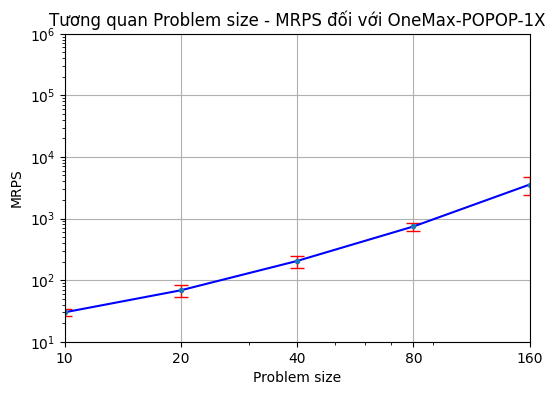

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))

# plots
ax.errorbar(problem_sizes, mrps_mean, yerr=mrps_std, fmt='.', ecolor='r', linewidth=1, capsize=5)
ax.plot(problem_sizes, mrps_mean, c='b')
ax.axis([10, 160, 10, 1e6])
ax.grid(visible=True, which='major', axis='both')
ax.set_title('Tương quan Problem size - MRPS đối với OneMax-POPOP-1X')

#set x_axis
ax.set_xlabel('Problem size')
ax.set_xscale('log')
ax.set_xticks(ticks=problem_sizes, labels=problem_sizes)

# set y_axis
ax.set_yscale('log')
ax.set_ylabel('MRPS')

plt.show()

In [43]:
fig.savefig('graphs/Problem size - MRPS - OneMax-POPOP-1X.png')

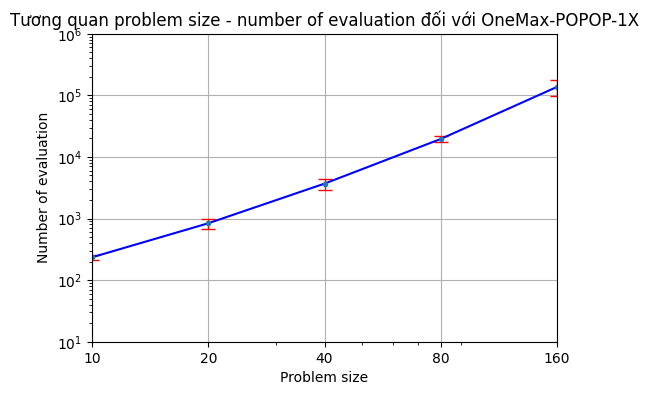

In [44]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.errorbar(problem_sizes, evaluations_mean, yerr=evaluations_std, fmt='.', ecolor='r', linewidth=1, capsize=5)
ax.plot(problem_sizes, evaluations_mean, c='b')
ax.axis([10, 160, 10, 1e6])
ax.grid(visible=True, which='major', axis='both')
ax.set_title('Tương quan problem size - number of evaluation đối với OneMax-POPOP-1X')

ax.set_xlabel('Problem size')
ax.set_xscale('log')
ax.set_xticks(ticks=problem_sizes, labels=problem_sizes)

ax.set_ylabel('Number of evaluation')
ax.set_yscale('log')

plt.show()

In [45]:
fig.savefig('graphs/problem size - number of evaluation - OneMax-POPOP-1X.png')